In [53]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [54]:
# path 정보 확인
a = os.getcwd()
print(a)
aa = os.path.join(os.getcwd(), "dataset/input/")
print(aa)

print(len(os.listdir(aa)))
print(os.listdir(aa))

/home/vips/share/Gwanghyun/Audio/snoring
/home/vips/share/Gwanghyun/Audio/snoring/dataset/input/
2
['test_snoring_5s.h5', 'train_snoring_5s.h5']


In [55]:
path = os.path.join(os.getcwd(), "dataset/spectrogram/")

hf = h5py.File(path + "4-0-15.h5", 'r')

spectrograms = np.array(hf.get('spectograms'))
targets = np.array(hf.get('targets')).astype(np.long)
hf.close()
print(spectrograms.shape)

(180, 129, 155)


/tmp/ipykernel_29669/3093997226.py:6: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  targets = np.array(hf.get('targets')).astype(np.long)


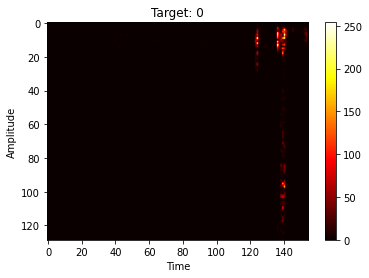

In [56]:
plt.imshow(spectrograms[0], cmap="hot")
plt.xlabel(f"Time")
plt.ylabel(f"Amplitude")
plt.colorbar()
plt.title(f"Target: {targets[0]}")
plt.show()

In [57]:
import librosa, librosa.display
import IPython.display

sr = 4000
n_fft = 256

In [49]:
test_spectrograms = spectrograms[0].astype(np.float64)
print(test_spectrograms.shape)
print(test_spectrograms.dtype)

(129, 155)
float64


In [50]:
#mel -> audio
audio_0 = librosa.feature.inverse.mel_to_audio(test_spectrograms, sr=4000, n_fft=256)

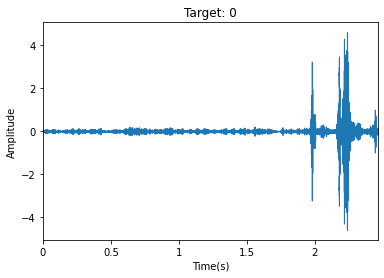

In [51]:
#waveform
plt.figure()
librosa.display.waveplot(audio_0, 4000)
plt.xlabel(f"Time(s)")
plt.ylabel(f"Amplitude")
plt.title(f"Target: {targets[0]}")
plt.show()

In [58]:
print(librosa.__version__)

0.8.1


In [46]:
librosa.output.write_wav('origin_0.wav', audio_0, sr)

AttributeError: module 'librosa' has no attribute 'output'

In [44]:
IPython.display.Audio(data=audio_0, rate=4000)

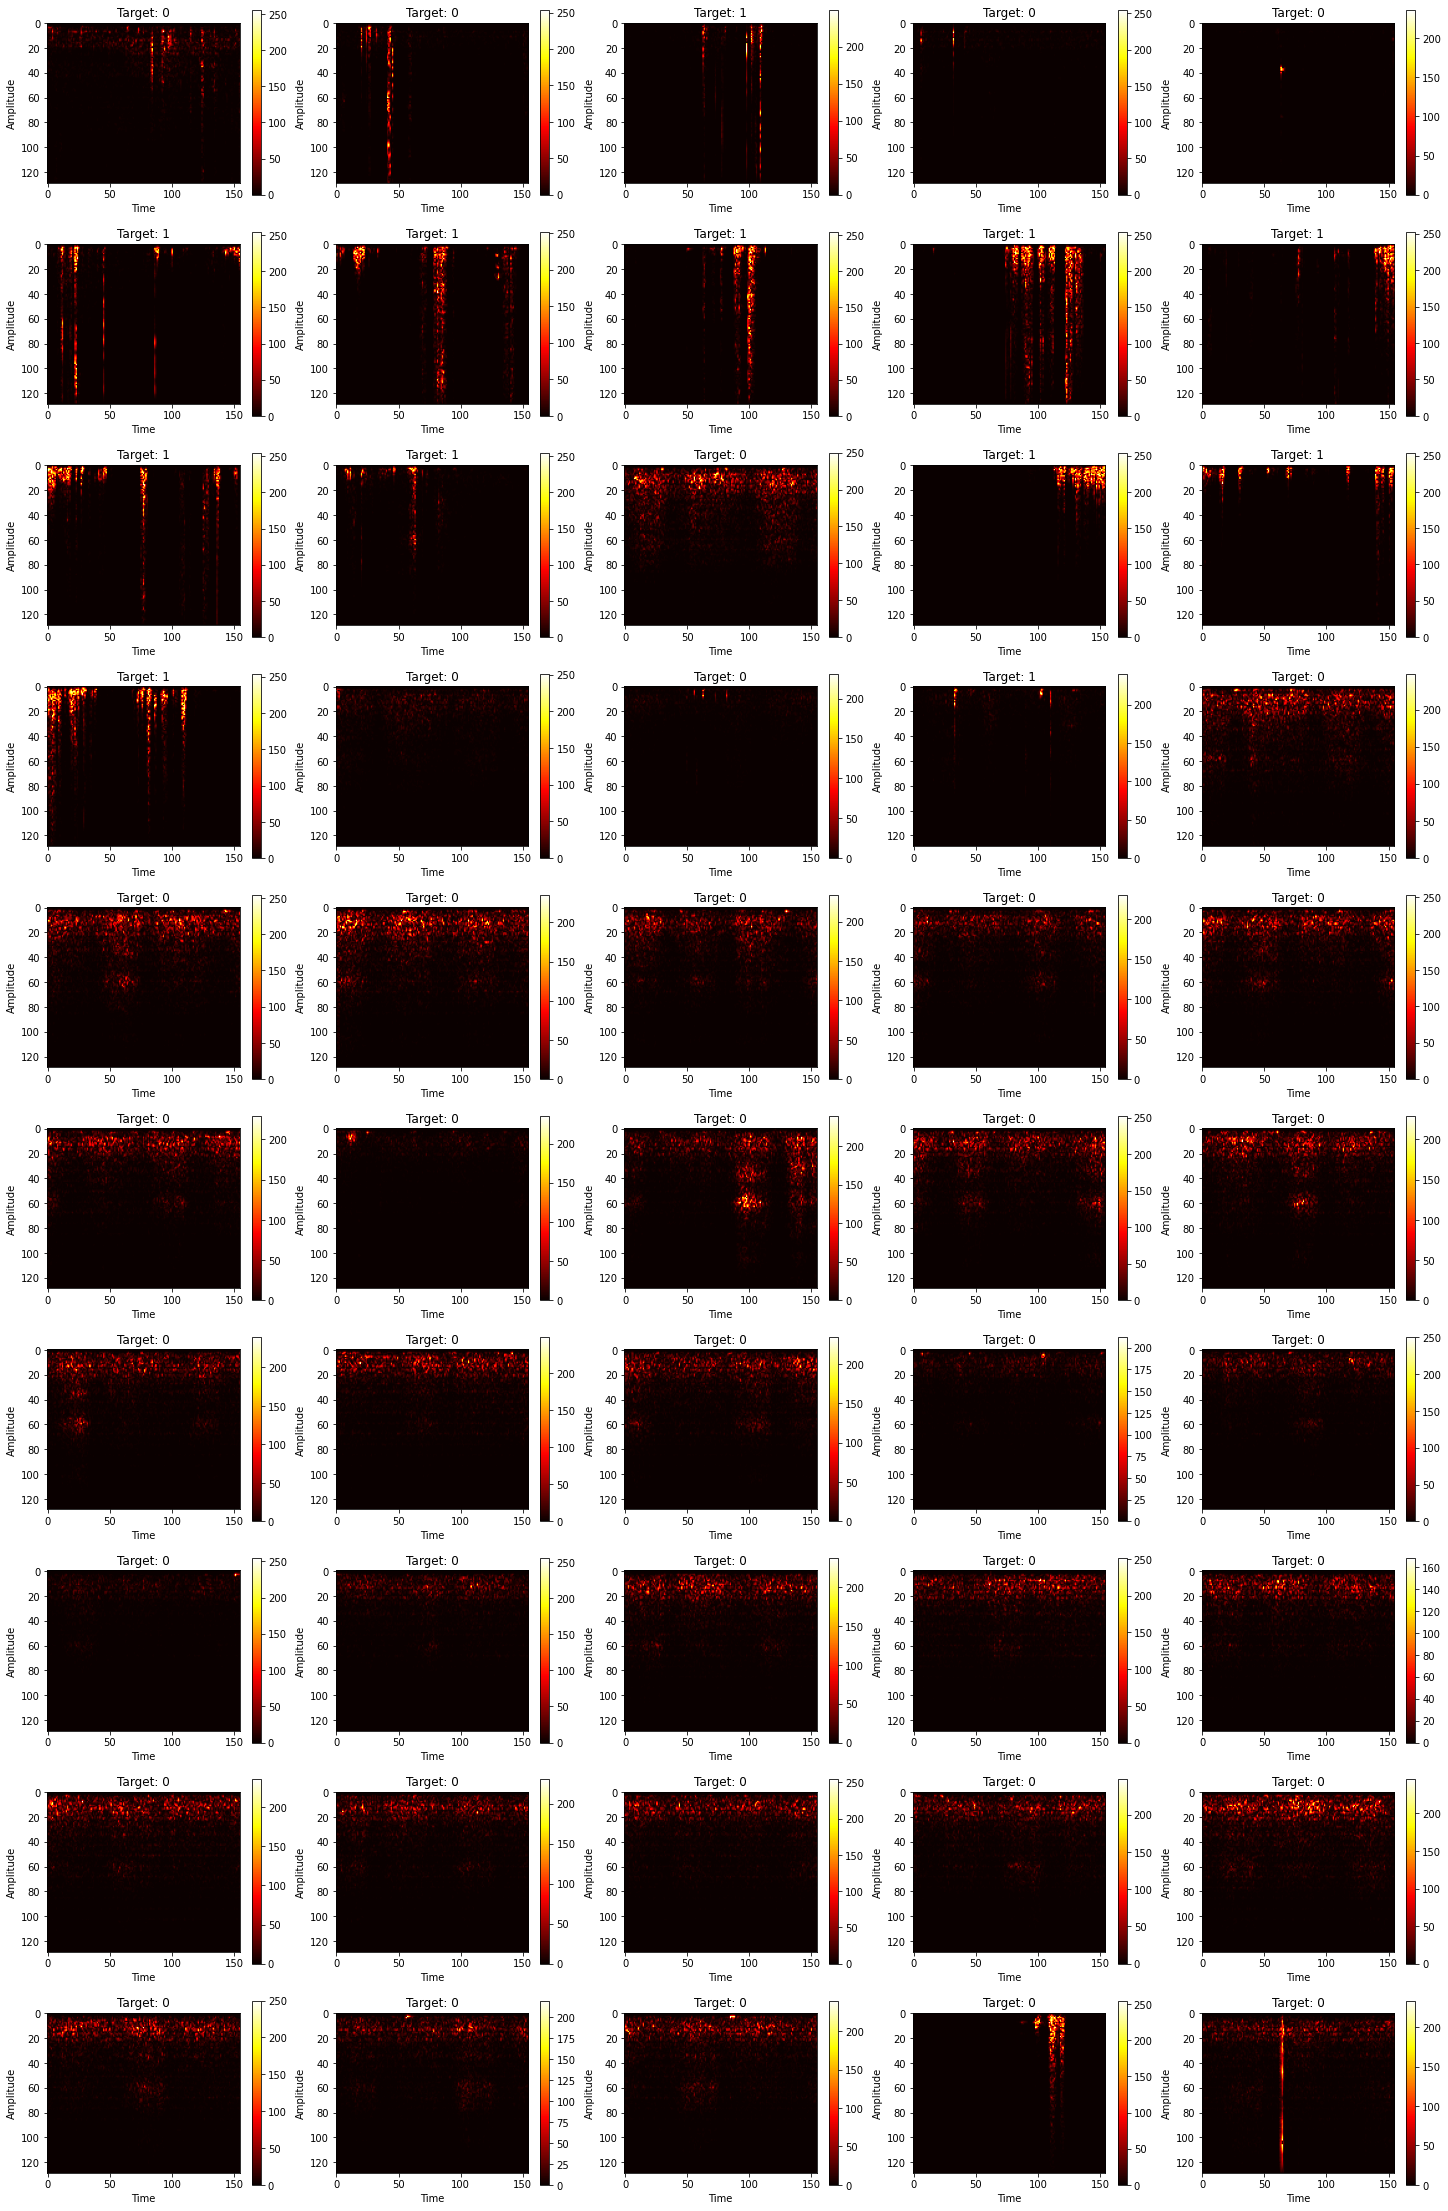

In [45]:
fig=plt.figure(figsize=(25, 40))
columns = 5
rows = 10
for i in range(1, columns*rows +1):
    img = spectrograms[i]
    fig.add_subplot(rows, columns, i)
    plt.xlabel(f"Time")
    plt.ylabel(f"Amplitude")    
    plt.title(f"Target: {targets[i]}")
    plt.imshow(img, cmap="hot")
    plt.colorbar()

plt.show()

In [67]:
train_data = np.empty(shape=(1, 129, 155))
train_labels = np.empty(shape=(1))

test_data = np.empty(shape=(1, 129, 155))
test_labels = np.empty(shape=(1))
for f in os.listdir(path):
    print(f)
    hf = h5py.File(path + f, 'r')
    spectrograms = np.array(hf.get('spectograms'))
    targets = np.array(hf.get('targets')).astype(np.long)
    hf.close()
    
    n = targets.shape[0]
    index = np.random.permutation(n)
    index_train = index[:int(4*n/5)]
    index_test = index[int(4*n/5):]
       
    train_spectrograms = spectrograms[index_train]
    test_spectrograms = spectrograms[index_test]
    train_targets = targets[index_train]
    test_targets = targets[index_test]
    
    train_data = np.concatenate([train_data, train_spectrograms])
    train_labels = np.concatenate([train_labels, train_targets])
    
    test_data = np.concatenate([test_data, test_spectrograms])
    test_labels = np.concatenate([test_labels, test_targets])

9-345-360.h5
7-345-360.h5
9-240-255.h5
9-300-315.h5
4-210-225.h5
8-135-150.h5
5-45-60.h5
4-15-30.h5
1-15-30.h5
7-60-75.h5
4-285-300.h5
4-195-210.h5
9-120-135.h5
9-225-240.h5
8-315-330.h5
1-90-105.h5
1-0-15.h5
1-135-150.h5
1-285-300.h5
4-30-45.h5
1-195-210.h5
4-165-180.h5
8-165-180.h5
7-0-15.h5
8-15-30.h5
1-240-255.h5
9-330-345.h5
1-120-135.h5
8-345-360.h5
4-0-15.h5
7-105-120.h5
8-180-195.h5
9-405-420.h5
5-90-105.h5
9-360-375.h5
7-195-210.h5
4-240-255.h5
8-285-300.h5
9-45-60.h5
7-315-330.h5
1-210-225.h5
1-225-240.h5
9-195-210.h5
7-285-300.h5
9-105-120.h5
8-75-90.h5
7-300-315.h5
1-165-180.h5
1-30-45.h5
4-90-105.h5
5-60-75.h5
9-270-285.h5
9-180-195.h5
8-60-75.h5
9-15-30.h5
8-225-240.h5
4-135-150.h5
1-255-270.h5
1-60-75.h5
4-255-270.h5
1-315-330.h5
7-360-375.h5
7-90-105.h5
9-135-150.h5
8-270-285.h5
7-75-90.h5
1-105-120.h5
9-375-390.h5
8-105-120.h5
9-390-405.h5
7-225-240.h5
7-375-390.h5
4-120-135.h5
4-180-195.h5
9-315-330.h5
7-165-180.h5
8-0-15.h5
7-15-30.h5
7-150-165.h5
7-45-60.h5
8-30-45.

In [68]:
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(19009, 129, 155)
(19009,)
(4753, 129, 155)
(4753,)


In [69]:
hf = h5py.File(os.getcwd() + "/data/train_snoring_5s.h5", 'w')
hf.create_dataset('spectrograms', data=train_data[1:])
hf.create_dataset('targets', data=train_labels[1:])
hf.close()

hf = h5py.File(os.getcwd() + "/data/test_snoring_5s.h5", 'w')
hf.create_dataset('spectrograms', data=test_data[1:])
hf.create_dataset('targets', data=test_labels[1:])
hf.close()

npy file 형식

In [72]:
path2 = os.path.join(os.getcwd(), "4class_audio/")
print(os.listdir(path2))

G_spectrograms = np.load(path2 + 'ssX_train4.npy')
G_targets = np.load(path2 + 'sstrain_label4.npy')

print(G_spectrograms.shape)
print(G_targets.shape)

['sstest_label4.npy', 'ssX_train4.npy', 'sstrain_label4.npy', 'ssX_test4.npy']
(282, 21, 128)
(282,)


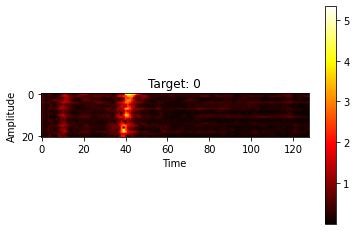

In [74]:
plt.imshow(G_spectrograms[100], cmap="hot")
plt.xlabel(f"Time")
plt.ylabel(f"Amplitude")
plt.colorbar()
plt.title(f"Target: {targets[100]}")
plt.show()